<a href="https://colab.research.google.com/github/alphadi/Portfolio_Projects/blob/main/Kaggle/train_test_and_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

df_train = pd.read_csv("sample_data/california_housing_train.csv")
df_test = pd.read_csv("sample_data/california_housing_test.csv")

df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


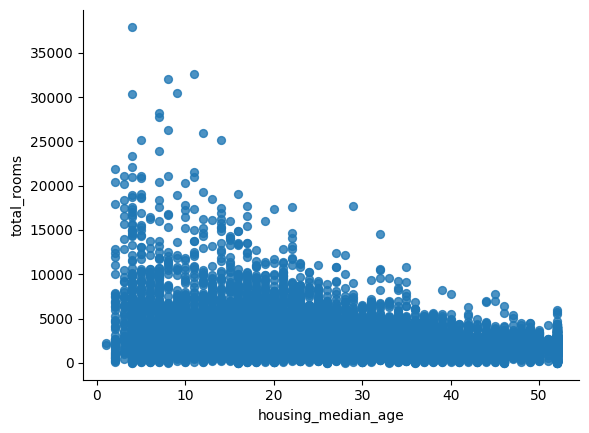

In [4]:
# @title housing_median_age vs total_rooms

from matplotlib import pyplot as plt
df_train.plot(kind='scatter', x='housing_median_age', y='total_rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
df_train2 = df_train[['housing_median_age','population','median_house_value']]
df_train2.head()

,housing_median_age,population,median_house_value
0,15.0,1015.0,66900.0
1,19.0,1129.0,80100.0
2,17.0,333.0,85700.0
3,14.0,515.0,73400.0
4,20.0,624.0,65500.0


In [7]:
df_test2 = df_test[['housing_median_age','population','median_house_value']]
df_test2.head()

,housing_median_age,population,median_house_value
0,27.0,1537.0,344700.0
1,43.0,809.0,176500.0
2,27.0,1484.0,270500.0
3,28.0,49.0,330000.0
4,19.0,850.0,81700.0


In [8]:
df_train2_np = df_train2.to_numpy()

X_train, y_train = df_train2_np[:,:-1], df_train2_np[:,-1]

X_train.shape, y_train.shape


((17000, 2), (17000,))

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

linear_model = LinearRegression().fit(X_train,y_train)

linear_train_preds = linear_model.predict(X_train)
mean_absolute_error(linear_train_preds,y_train)



91064.44407843439

In [10]:
df_test2_np = df_test2.to_numpy()
X_test, y_test = df_test2_np[:,:-1], df_test2_np[:,-1]
X_test.shape, y_test.shape

((3000, 2), (3000,))

In [11]:
linear_test_preds = linear_model.predict(X_test)
mean_absolute_error(linear_test_preds,y_test)

89391.632907449

In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=10,max_depth=5).fit(X_train,y_train)

rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

mean_absolute_error(rf_train_preds,y_train),mean_absolute_error(rf_test_preds,y_test)

(88958.12325704425, 87944.81750878478)

In [15]:
from sklearn.model_selection import train_test_split

X_val,X_hold,y_val,y_hold = train_test_split(X_test,y_test,test_size=.5)
X_val.shape,X_hold.shape,y_val.shape,y_hold.shape

((1500, 2), (1500, 2), (1500,), (1500,))

In [16]:
linear_val_preds = linear_model.predict(X_val)
linear_test_preds = linear_model.predict(X_hold)

mean_absolute_error(linear_val_preds,y_val), mean_absolute_error(linear_test_preds,y_hold)

(89753.24805374503, 89030.01776115301)

In [17]:
mean_absolute_error(linear_train_preds,y_train), mean_absolute_error(linear_val_preds,y_val)


(91064.44407843439, 89753.24805374503)

In [18]:
rf_val_preds = rf_model.predict(X_val)
rf_test_preds = rf_model.predict(X_hold)

mean_absolute_error(rf_train_preds,y_train) ,mean_absolute_error(rf_val_preds,y_val)

(88958.12325704425, 88082.38700958106)

In [19]:
mean_absolute_error(rf_train_preds,y_train),mean_absolute_error(rf_val_preds,y_val)

(88958.12325704425, 88082.38700958106)

In [20]:
rf_hold_preds = rf_model.predict(X_hold)

mean_absolute_error(rf_hold_preds,y_hold)


87807.24800798847

## K Fold Cross Validation

In [23]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

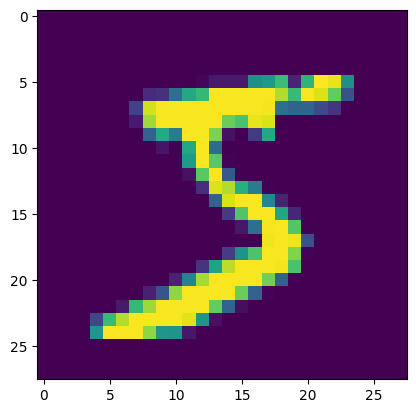

In [25]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])


In [28]:
from sklearn.model_selection import train_test_split

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=.5)

X_val.shape, X_test.shape, y_val.shape, y_test.shape

((5000, 28, 28), (5000, 28, 28), (5000,), (5000,))

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=14,max_depth=9).fit(X_train.reshape(60000,-1),y_train)

rf_train_preds = rf_model.predict(X_train.reshape(60000,-1))
rf_val_preds = rf_model.predict(X_val.reshape(5000,-1))


accuracy_score(rf_train_preds,y_train), accuracy_score(rf_val_preds,y_val)

(0.9376833333333333, 0.93)

In [34]:
rf_test_preds = rf_model.predict(X_test.reshape((5000,-1)))

accuracy_score(rf_test_preds,y_test)

0.9306

In [37]:
from sklearn.model_selection import cross_val_score

cross_val_score(rf_model,X_train.reshape((60000,-1)),y_train,cv=7)

array([0.92545497, 0.91367242, 0.92160523, 0.913429  , 0.91447906,
       0.91447906, 0.93174659])

In [41]:
test_preds = rf_model.predict(X_test.reshape(X_test.shape[0], -1))
#Reshape X_test to have the correct number of features (784)
#X_test.shape[0] gives you the number of samples in X_test

accuracy_score(test_preds,y_test)

0.9306